# Neuroimaging Visualization Project using Neurosynth Maps

**Name:** João Luís Silva Ferraz  
**Date:** 30/11/2025

Concepts analysed:
- **Memory:** https://neurosynth.org/analyses/terms/memory  
- **Second concept (user-defined):**  
  → Choose any concept from https://neurosynth.org, download the uniformity map, add it to this folder, and test it in this notebook.

This notebook identifies, loads, and visualises Neurosynth statistical maps associated with a chosen psychological concept.

The pipeline is divided into three main steps:
1. File identification and validation
2. Image preprocessing and brain visualization
3. Voxel intensity distribution analysis


## 1. Importing packages and locating image files

In this cell we:

- Import all necessary Python libraries (nilearn, nibabel, matplotlib, numpy and os)
- Ask the user to input a psychological concept (e.g. *memory*, *depression*)
- Scan the current folder for:
  - An anatomical brain image (`anatomical` in filename)
  - A functional Neurosynth map (`uniformity` + concept in filename)
- Perform safety checks to ensure:
  - Both files were found
  - The correct file naming pattern was used


In [ ]:
import os
from nilearn import plotting
import nibabel as nib
from nibabel import Nifti1Image
import matplotlib.pyplot as plt
import numpy as np


# Ask the user for the concept first
concept = input("Enter the concept name (e.g., memory, depression): ").lower() # We convert to lower case (.lower()) to match filenames better

# Now let's locate the files

# Define the files we want
anat_file = None
func_file = None

folder = os.listdir(".")  # Grabbing our current folder

for file in folder:  # Now we're going to find our files by checking each file in the folder
    if file.endswith(".nii.gz"):  # looking for this type of file
        # Check for anatomical and functional files
        if "anatomical" in file:
            anat_file = file
        elif "uniformity" in file and concept in file:
            func_file = file

# Safety check with multiple error messages to make it easier if anything goes wrong
if anat_file == None and func_file == None:
    raise FileNotFoundError(
        "ERROR: None of the Files were found. Please verify the folder content."
    )
elif anat_file == None:
    raise FileNotFoundError(
        "ERROR: Anatomical File not found (look for 'anatomical' in filename)."
    )
elif func_file == None:
    raise FileNotFoundError(
        f"ERROR: Functional File for '{concept}' not found (look for 'uniformity' and '{concept}' in filename)."
    )
elif anat_file != None and func_file != None:
    print(
        f"Files located:\n Your Anatomical file is: {anat_file}\n Your Functional file is: {func_file}"
    )

Files located:
 Your Anatomical file is: anatomical.nii.gz
 Your Functional file is: memory_uniformity-test_z_FDR_0.01.nii.gz


## 2. Pre-processing and visualisation of the functional map

Here we:

- Load the functional image using `nibabel`
- Extract voxel data using `.get_fdata()`
- Remove all negative values to focus only on positive activations
- Create a new NIFTI image containing only positive values
- Overlay this functional map on the anatomical brain
- Focus on the hippocampus region using specific slice coordinates



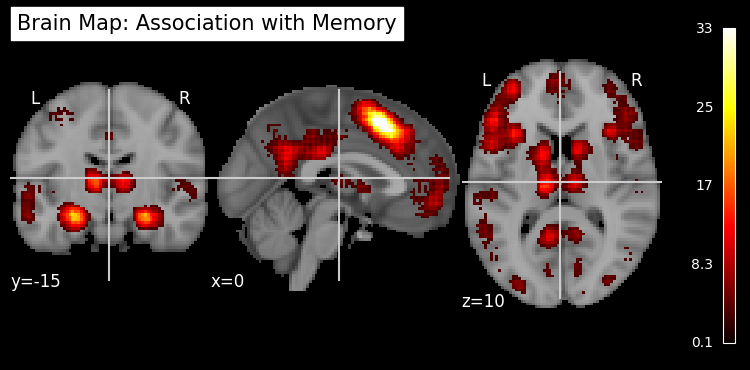

In [ ]:
# Load the original image
img_original = nib.load(func_file)
data = img_original.get_fdata()

# Remove negative values
data[data < 0] = 0 

# Create a new nifti image with this filtered data
from nibabel import Nifti1Image
positive_img = Nifti1Image(data, img_original.affine, img_original.header)

plotting.plot_stat_map(
    positive_img,
    bg_img=anat_file,
    threshold=0.1,
    cmap='hot',
    title=f"Brain Map: Association with {concept.title()}", 
    cut_coords=(0, -15, 10),
    display_mode='ortho'
)
plt.show()

## 3. Distribution of voxel values

In this final step, we:

- Extract only the positive voxel values
- Create a histogram to observe the distribution of Z-values
- Add a title, axis labels and a grid for readability

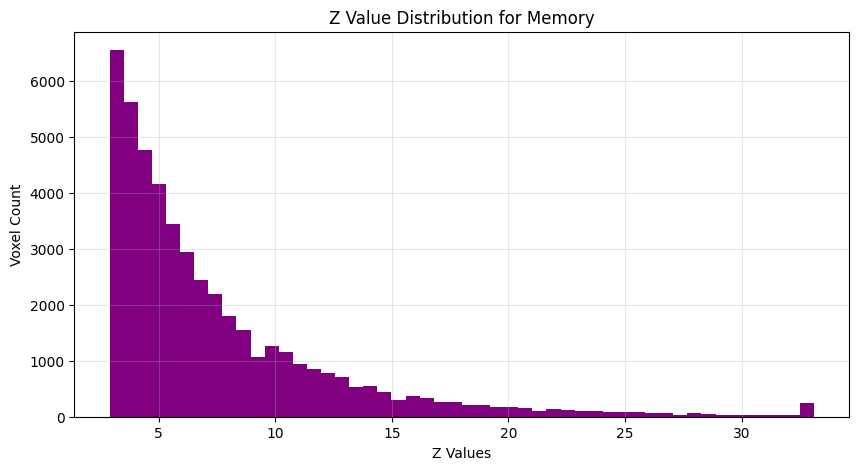

In [6]:
# Filter the postive values
positives = data[data > 0]

# Let's plot
plt.figure(figsize=(10, 5))
plt.hist(
    positives, bins=50, color="purple"
)  # the thick bars looked wierd so let's put the bins=50

# And custumize
plt.title(f"Z Value Distribution for {concept.title()}")
plt.xlabel("Z Values")
plt.ylabel("Voxel Count")
plt.grid(True, alpha=0.3)

plt.show()